# Analyze the dependencies in pypi metadata
I parsed the requirements out of every package on pypi using the PyPi_Metatdata and Parse_requirements notebook. The output is two csv files:

- requirements.csv: Contains the packages and their formal requirements
- base_requirements.csv:  Contains similar information, but digs down to the base requirement for every package. For example: astroquery depends on astropy, which depends on numpy and a variety of other things. Therefore, astropy is not listed as a base requirement for astroquery, but numpy is.

In [1]:
import pandas as pd
import networkx as nx
from networkx.drawing.nx_pydot import write_dot
import matplotlib.pyplot as plt

%matplotlib inline

## Read in the requirements data.

The data is stored in a csv file (separated by the '\t' character) with the following three columns:

In [2]:
requirements = pd.read_csv('requirements.csv')
base_requirements = pd.read_csv('base_requirements.csv')
print(requirements.shape)
print(base_requirements.shape)

(110104, 4)
(278033, 2)


In [3]:
def make_graph(df, min_edges=0):
    DG = nx.DiGraph()
    DG.add_nodes_from(df.package_name.unique())
    edges = df.loc[df.requirement.notnull(), ['package_name', 'requirement']].values
    DG.add_edges_from(edges)
    
    deg = DG.degree()
    to_remove = [n for n in deg if deg[n] <= min_edges]
    DG.remove_nodes_from(to_remove)
    return DG

In [108]:
#DG = make_graph(requirements.loc[requirements.requirement.notnull()].head(1000))
DG = make_graph(requirements, min_edges=0)
#nx.draw_graphviz(DG)
len(DG.nodes()), len(DG.edges())
write_dot(DG, 'requirements_graph_full.dot')

In [ ]:
DG = make_graph(base_requirements, min_edges=3)
#nx.draw_graphviz(DG)
write_dot(DG, 'base_requirements_graph.dot')

In [4]:
dep_graph = make_graph(requirements, min_edges=0)
len(dep_graph.node)

26274

In [58]:
basedep_graph = make_graph(base_requirements, min_edges=0)
len(basedep_graph.node)

26230

In [5]:
dep_graph.remove_nodes_from(['.', 'nan'])
#basedep_graph.remove_node('.')

# Statistic plots

In [6]:
import seaborn as sns
import matplotlib.pyplot as plot
import operator
import numpy as np
sns.set_context('notebook', font_scale=1.5)
sns.set_style('white')

%matplotlib inline

/home/kgullikson/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## 1: Histogram of the number of connections for the top several packages

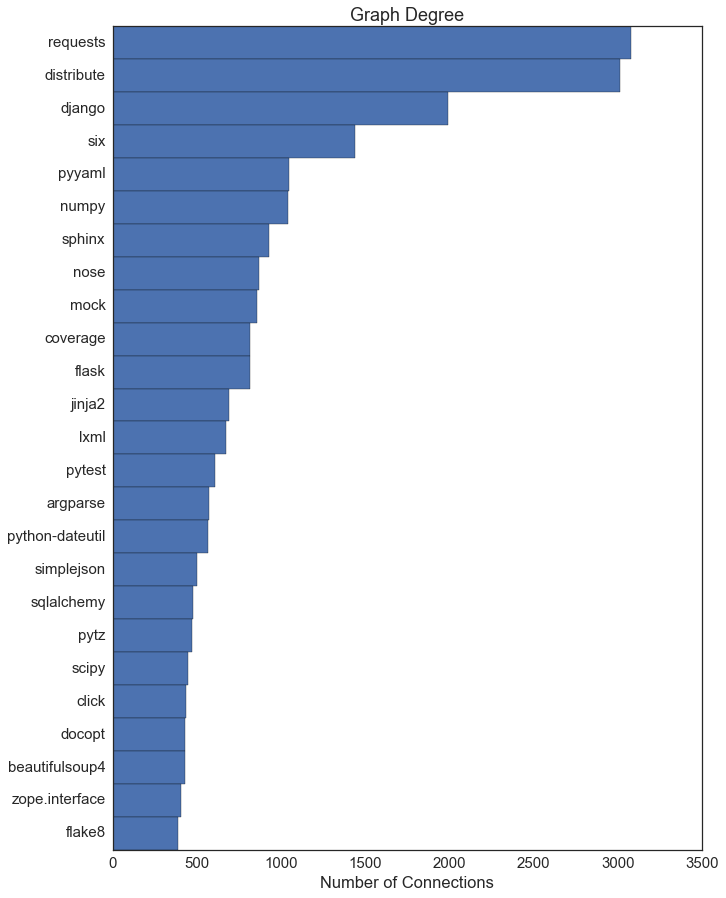

In [7]:
sorted_dict = sorted(dep_graph.in_degree().items(), key=operator.itemgetter(1))[::-1]

N = 25
x = np.arange(N)
y = np.array([d[1] for d in sorted_dict[:N]])
xlabels = [d[0] for d in sorted_dict[:N]][::-1]
fig, ax = plt.subplots(1, 1, figsize=(13, 13))

ax.barh(x[::-1], y, height=1.0)
ax.set_yticks(x + 0.5)
_ = ax.set_yticklabels(xlabels)
ax.set_xlabel('Number of Connections')
ax.set_title('Graph Degree')
fig.subplots_adjust(left=0.27, bottom=0.07, top=0.95)

fig.savefig('Figures/Connections.png')

In [9]:
dep_graph.in_degree()['numpy']

1044

## 2: Same thing, but with the base-requirements graph

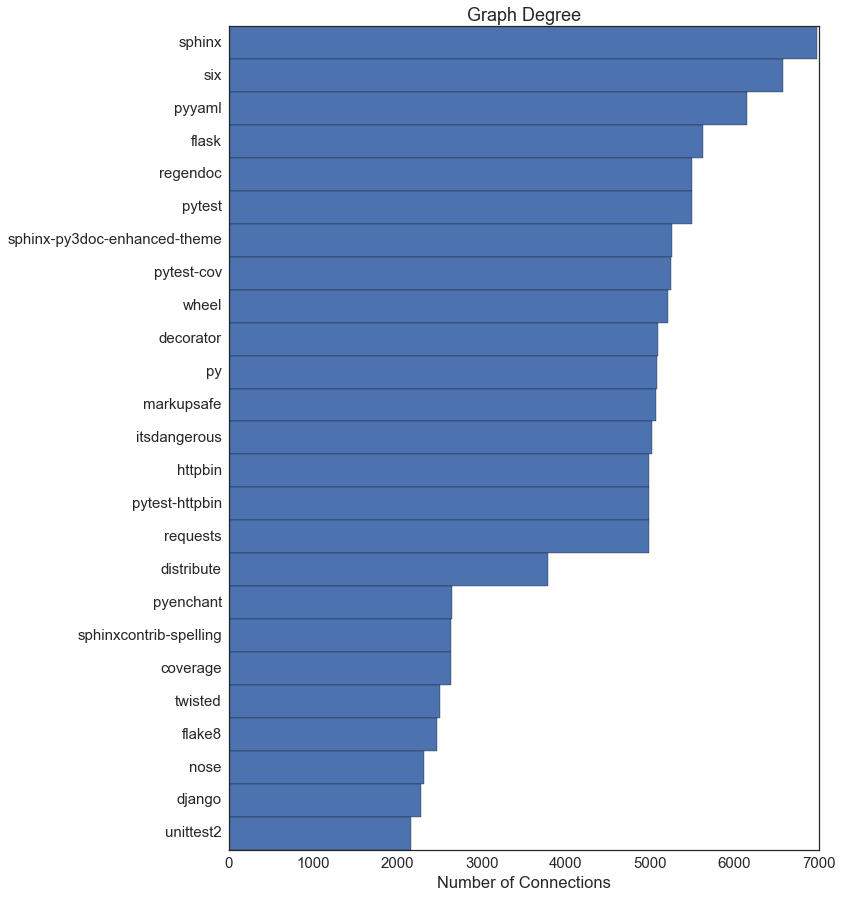

In [66]:
sorted_dict = sorted(basedep_graph.in_degree().items(), key=operator.itemgetter(1))[::-1]

N = 25
x = np.arange(N)
y = np.array([d[1] for d in sorted_dict[:N]])
xlabels = [d[0] for d in sorted_dict[:N]][::-1]
fig, ax = plt.subplots(1, 1, figsize=(13, 13))

ax.barh(x[::-1], y, height=1.0)
ax.set_yticks(x + 0.5)
_ = ax.set_yticklabels(xlabels)
ax.set_xlabel('Number of Connections')
ax.set_title('Graph Degree')
fig.subplots_adjust(left=0.27, bottom=0.07, top=0.95)

fig.savefig('Figures/BaseConnections.png')

## PageRank

TODO: Describe what PageRank is...

In [7]:
pr = nx.link_analysis.pagerank_scipy(dep_graph)

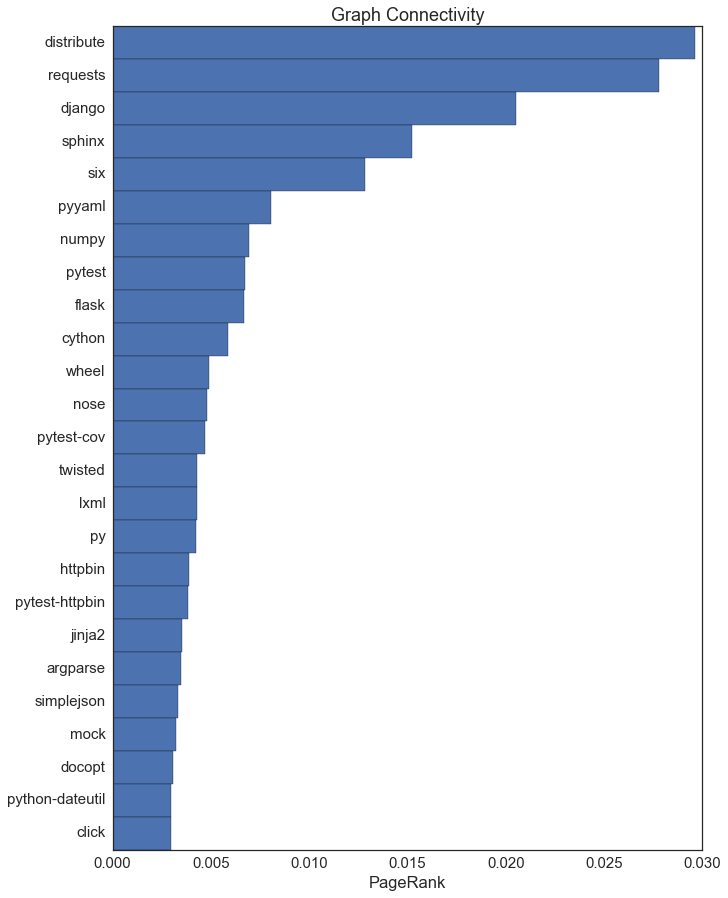

In [9]:
sorted_dict = sorted(pr.items(), key=operator.itemgetter(1))[::-1]

N = 25
x = np.arange(N)
y = np.array([d[1] for d in sorted_dict[:N]])
xlabels = [d[0] for d in sorted_dict[:N]][::-1]
fig, ax = plt.subplots(1, 1, figsize=(13, 13))

ax.barh(x[::-1], y, height=1.0)
ax.set_yticks(x + 0.5)
_ = ax.set_yticklabels(xlabels)
ax.set_xlabel('PageRank')
ax.set_title('Graph Connectivity')
fig.subplots_adjust(left=0.27, bottom=0.07, top=0.95)

fig.savefig('Figures/PageRank.png')

In [69]:
basedep_graph.degree()['astropy'], basedep_graph.in_degree()['astropy']

(72, 66)

In [95]:
dep_graph = make_graph(requirements, min_edges=10)

#deg = dep_graph.in_degree()
#to_remove = [n for n in deg if deg[n] <= 100]
#for p in to_remove:
#    print(p, deg[p])
#dep_graph.remove_nodes_from(to_remove)
write_dot(dep_graph, 'requirements_graph2.dot')

In [102]:
nx.average_clustering(dep_graph.to_undirected())

0.14002023883860776

In [92]:
for c in nx.strongly_connected_components(dep_graph):
    print(c)
    

set(['pgpy'])
set(['django-pagination'])
set(['redis'])
set(['paginate'])
set(['tqdm'])
set(['wheel'])
set(['six'])
set(['boto'])
set(['filechunkio'])
set(['futures'])
set(['jmespath'])
set(['tox'])
set(['docutils'])
set(['pyhamcrest'])
set(['behave'])
set(['sphinx'])
set(['nose'])
set(['python-dateutil'])
set(['python-subunit'])
set(['testrepository'])
set(['testresources'])
set(['discover'])
set(['twisted'])
set(['pyrsistent'])
set(['extras'])
set(['python-mimeparse'])
set(['unittest2'])
set(['contextlib2'])
set(['pyenchant'])
set(['sphinxcontrib-spelling'])
set(['coverage'])
set(['pip'])
set(['flask'])
set(['markupsafe'])
set(['itsdangerous'])
set(['decorator'])
set(['httpbin'])
set(['py'])
set(['sphinx-py3doc-enhanced-theme'])
set(['.'])
set(['pytest-cov'])
set(['pyyaml'])
set(['regendoc'])
set(['pytest'])
set(['pytest-httpbin'])
set(['requests'])
set(['pyflakes'])
set(['mccabe'])
set(['pep8'])
set(['flake8'])
set(['testtools', 'pbr', 'oslosphinx', 'linecache2', 'traceback2', 'test

In [84]:
dep_graph.remove_nodes_from?